# To Predict which employees are prone to leave next

The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee.

- Satisfaction Level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Departments (column sales)
- Salary
- Whether the employee has left

 Objective - What type of employees are leaving? Determine which employees are prone to leave next. 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

### Existing Employee Dataset

In [4]:
exist_emp = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',
                          sheet_name='Existing employees'
                         , index_col='Emp ID')

In [5]:
exist_emp.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low
2002,0.82,0.67,2,202,3,0,0,sales,low


### Employees who have left

In [7]:
emp_left = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',sheet_name='Employees who have left', index_col='Emp ID'  )

In [8]:
emp_left.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low
2,0.80,0.86,5,262,6,0,0,sales,medium


### Description Of Features

- Satisfaction Level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Departments (column sales)
- Salary
- Whether the employee has left


In [9]:
exist_emp.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.0
last_evaluation,11428.0,0.715473,0.162005,0.36,0.58,0.71,0.85,1.0
number_project,11428.0,3.786664,0.979884,2.00,3.00,4.00,4.00,6.0
average_montly_hours,11428.0,199.060203,45.682731,96.00,162.00,198.00,238.00,287.0
time_spend_company,11428.0,3.380032,1.562348,2.00,2.00,3.00,4.00,10.0
Work_accident,11428.0,0.175009,0.379991,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11428.0,0.026251,0.159889,0.00,0.00,0.00,0.00,1.0


In [10]:
exist_emp.shape

(11428, 9)

In [11]:
emp_left.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92
last_evaluation,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.00
number_project,3571.0,3.855503,1.818165,2.00,2.00,4.00,6.00,7.00
average_montly_hours,3571.0,207.419210,61.202825,126.00,146.00,224.00,262.00,310.00
time_spend_company,3571.0,3.876505,0.977698,2.00,3.00,4.00,5.00,6.00
Work_accident,3571.0,0.047326,0.212364,0.00,0.00,0.00,0.00,1.00
promotion_last_5years,3571.0,0.005321,0.072759,0.00,0.00,0.00,0.00,1.00


In [12]:
emp_left.shape

(3571, 9)

In [13]:
## Employee ID : Discrete
## satisfaction_level : Continuous
## last_evaluation : Continuous 
## number_project : Discrete
## average_monthly_hours : Discrete 
## time_spend_company : Discrete
## Work_accident : Categorical
## promotion_last_5years : Categorical 
## dept : Categorical (Sales, Support, Management, Marketing, IT, Technical, HR, Accounting, Product_mng, RandD)
## salary : Categorical (Low, Medium, High)

### EDA
Comparing both the dataframes

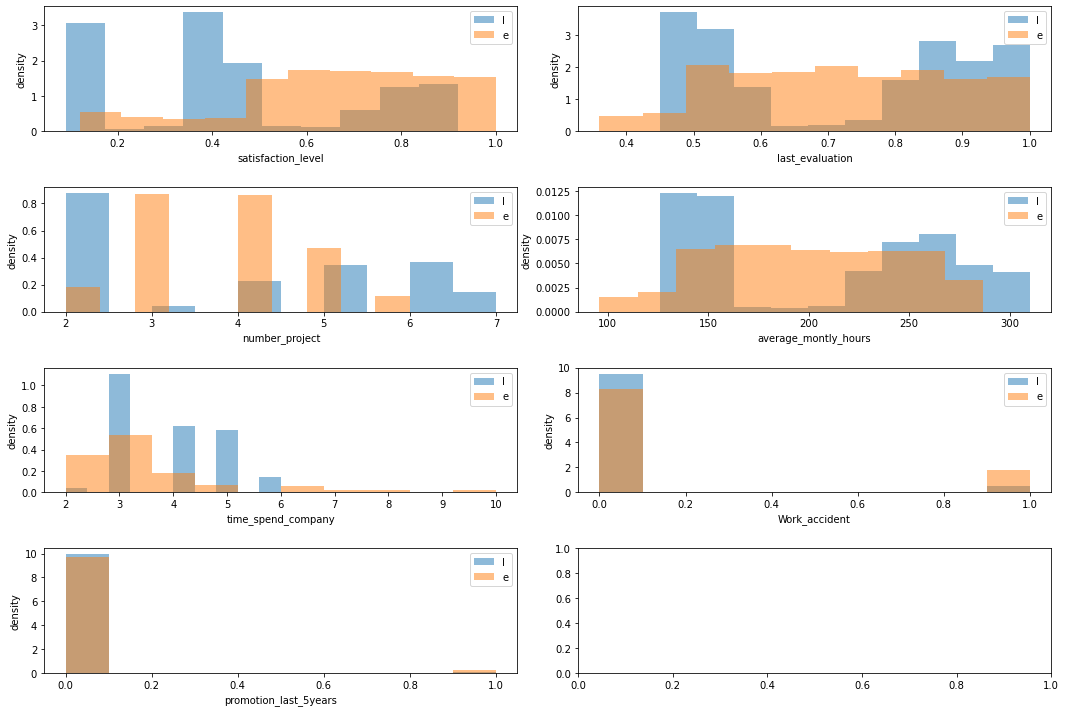

In [14]:
f,ax = plt.subplots(nrows=4, ncols=2, figsize =(15,10))
ax = ax.flatten()
for axx, col in enumerate(exist_emp.select_dtypes(include=['float64', 'int64']).columns):

    ax[axx].hist(emp_left[col], alpha=0.5, density=True, bins = 10, label =  col)
    ax[axx].hist(exist_emp[col], alpha=0.5, density=True, bins = 10, label = col)
    ax[axx].set_xlabel(col)
    ax[axx].set_ylabel('density')
    ax[axx].legend('le')
    
plt.tight_layout(h_pad=2.0)

We can see that :

    1. The satisfaction level is usually less for employees who left (< 0.5)
    2. There were some employees who left with a satisfaction level of 0.9
    3. There was no employee with 1 satisfaction 
    
    4. Last evaluation is almost the same for all the existing employees.
    5. Laast Evaluation in people who left have some peaks though
    
    6. Employees either who have less projects (comparitively more) or who have more projects are leaving more
    7. Same story for average_monthly_hours
    
    8. `time_spend_copmany` less than 6 for all left employees. (interesting thought)
    9. There is a very small minority with work_accident = True
    10. Hardly any specific observation from promotion in last 5years

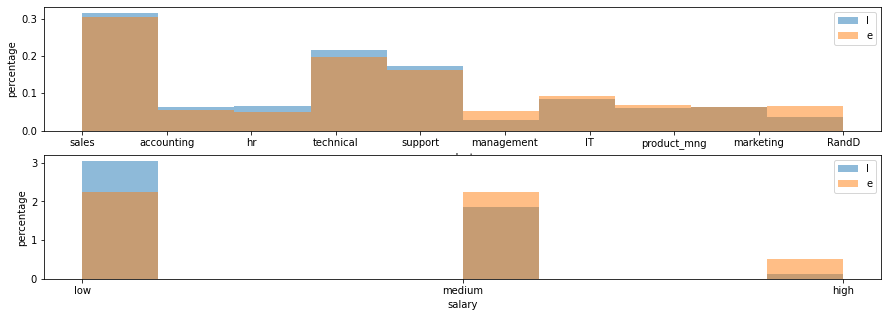

In [15]:
f,ax = plt.subplots(nrows=2, figsize =(15,5))
ax = ax.flatten()
for axx, col in enumerate(exist_emp.select_dtypes(exclude=['float64', 'int64']).columns):

    ax[axx].hist(emp_left[col], alpha=0.5, density=True, bins = 10, label =  col)
    ax[axx].hist(exist_emp[col], alpha=0.5, density=True, bins = 10, label = col)
    ax[axx].set_xlabel(col)
    ax[axx].set_ylabel('percentage')
    ax[axx].legend('le')

 Inference from here :
 
     1. EMployees with low salary leave the most compared to other 
     2. There is no particular information from department since we have almost same distribution

#### Features responsible for an employee to leave

- satisfaction_level
- last_evaluation
- work_accident
- salary
- time-spend_company
- number_project
- average_monthly_hours

### K-Means Clustering

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# lbl1 =  LabelEncoder()
# lbl2 =  LabelEncoder()


In [17]:
# emp_left['salary'] = lbl1.fit_transform(emp_left['salary'].values)
# emp_left['dept'] = lbl2.fit_transform(emp_left['dept'].values)
one_hot = OneHotEncoder(sparse=False)
def one_hot_encode(data,column, lbl_object, train = True):
    if train:
        temp = lbl_object.fit_transform(data[column].values.reshape(-1,1))
    else:
        temp = lbl_object.transform(data[column].values.reshape(-1,1))
    temp = pd.DataFrame(temp , columns= lbl_object.categories_)
    return pd.concat([data.reset_index(),temp], axis=1, ).drop(labels=[col], axis = 1)

In [18]:
train_existemp = one_hot_encode(exist_emp, 'salary', one_hot)

In [19]:
train_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',  ('high',),
                      ('low',),             ('medium',)]

In [20]:
train_existemp[train_columns]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,"(high,)","(low,)","(medium,)"
0,0.58,0.74,4,215,3,0,0.0,1.0,0.0
1,0.82,0.67,2,202,3,0,0.0,1.0,0.0
2,0.45,0.69,5,193,3,0,0.0,1.0,0.0
3,0.78,0.82,5,247,3,0,0.0,1.0,0.0
4,0.49,0.60,3,214,2,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1.0,0.0,0.0
11424,0.74,0.95,5,266,10,0,1.0,0.0,0.0
11425,0.85,0.54,3,185,10,0,1.0,0.0,0.0
11426,0.33,0.65,3,172,10,0,1.0,0.0,0.0


In [21]:
test_empleft = one_hot_encode(emp_left,'salary',one_hot, train=False)

In [22]:
train_existemp

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,"(high,)","(low,)","(medium,)"
0,2001,0.58,0.74,4,215,3,0,0,sales,0.0,1.0,0.0
1,2002,0.82,0.67,2,202,3,0,0,sales,0.0,1.0,0.0
2,2003,0.45,0.69,5,193,3,0,0,sales,0.0,1.0,0.0
3,2004,0.78,0.82,5,247,3,0,0,sales,0.0,1.0,0.0
4,2005,0.49,0.60,3,214,2,0,0,sales,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,1.0,0.0,0.0
11424,14208,0.74,0.95,5,266,10,0,1,management,1.0,0.0,0.0
11425,14209,0.85,0.54,3,185,10,0,1,management,1.0,0.0,0.0
11426,14210,0.33,0.65,3,172,10,0,1,marketing,1.0,0.0,0.0


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
train_existemp = scale.fit_transform(train_existemp[train_columns])
test_empleft = scale.transform(test_empleft[train_columns])

In [24]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(train_existemp) 
#     kmeanModel.fit(existing_employees)     
      
    distortions.append(sum(np.min(cdist(train_existemp, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / train_existemp.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(train_existemp, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / train_existemp.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

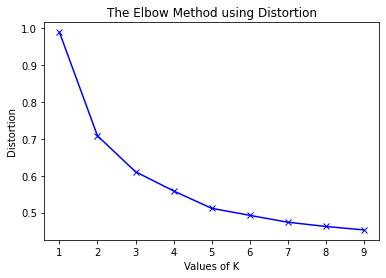

In [25]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 5)

In [27]:
kmeans.fit(train_existemp)

KMeans(n_clusters=5)

In [28]:
emp_left['cluster']  = kmeans.predict(test_empleft)

In [29]:
emp_left['cluster'].value_counts()

3    2077
0    1243
1      95
2      82
4      74
Name: cluster, dtype: int64

In [30]:
exist_emp['cluster'] = kmeans.predict(train_existemp)

In [31]:
exist_emp['cluster'].value_counts()

0    4266
3    4199
2    1155
1     945
4     863
Name: cluster, dtype: int64

> We can see 0 and 1 clusters have people which have charecterstics of leaving

The results are not very clear though. The quality of clusters is not good. Hence we will try cosine distance for similarity

In [32]:
from sklearn.cluster import k_means_
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.preprocessing import StandardScaler


def create_cluster(sparse_data, nclust = 10):

    # Manually override euclidean
    def euc_dist(X, Y = None, Y_norm_squared = None, squared = False):
        #return pairwise_distances(X, Y, metric = 'cosine', n_jobs = 10)
        return cosine_similarity(X, Y)
    k_means_.euclidean_distances = euc_dist
    
    scaler = StandardScaler(with_mean=False)
    sparse_data = scaler.fit_transform(sparse_data)
    kmeans = k_means_.KMeans(n_clusters = nclust, n_jobs = 20, random_state = 3425)
    _ = kmeans.fit(sparse_data)
    return (kmeans.labels_, kmeans)


C:\Users\Atanshi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
exist_emp['cosine'],model = create_cluster(train_existemp, nclust=5)

C:\Users\Atanshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [34]:
emp_left['cosine'] = model.predict(test_empleft)

In [35]:
exist_emp.cluster.value_counts()

0    4266
3    4199
2    1155
1     945
4     863
Name: cluster, dtype: int64

In [36]:
exist_emp.cosine.value_counts()

3    4055
0    3503
2    1715
1    1151
4    1004
Name: cosine, dtype: int64

In [37]:
emp_left.cosine.value_counts()

3    2254
0    1317
Name: cosine, dtype: int64

In [38]:
emp_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,cluster,cosine
Emp ID,,,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low,3,3
2,0.80,0.86,5,262,6,0,0,sales,medium,0,0
3,0.11,0.88,7,272,4,0,0,sales,medium,0,0
4,0.72,0.87,5,223,5,0,0,sales,low,3,3
5,0.37,0.52,2,159,3,0,0,sales,low,3,3
...,...,...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,support,low,3,3
14996,0.37,0.48,2,160,3,0,0,support,low,3,3
14997,0.37,0.53,2,143,3,0,0,support,low,3,3


The cosine similarity gives us quite clear indication that the cluster 0 and 3 belongs to basically the employees who are going to leave

#### Validating Results

Just to validate the results, we will look at the data distributions of cosine cluster 0 and 3 and matchup with emplooyees who have left

In [39]:
exist_emp[(exist_emp.cosine == 0) | (exist_emp.cosine == 3)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,cluster,cosine
Emp ID,,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low,3,3
2002,0.82,0.67,2,202,3,0,0,sales,low,3,3
2003,0.45,0.69,5,193,3,0,0,sales,low,3,3
2004,0.78,0.82,5,247,3,0,0,sales,low,3,3
2005,0.49,0.60,3,214,2,0,0,sales,low,3,3
...,...,...,...,...,...,...,...,...,...,...,...
14190,0.61,0.68,3,193,2,0,0,marketing,medium,0,0
14192,0.79,0.87,4,223,5,0,0,sales,medium,0,0
14197,0.72,0.64,4,192,3,0,0,sales,medium,0,0


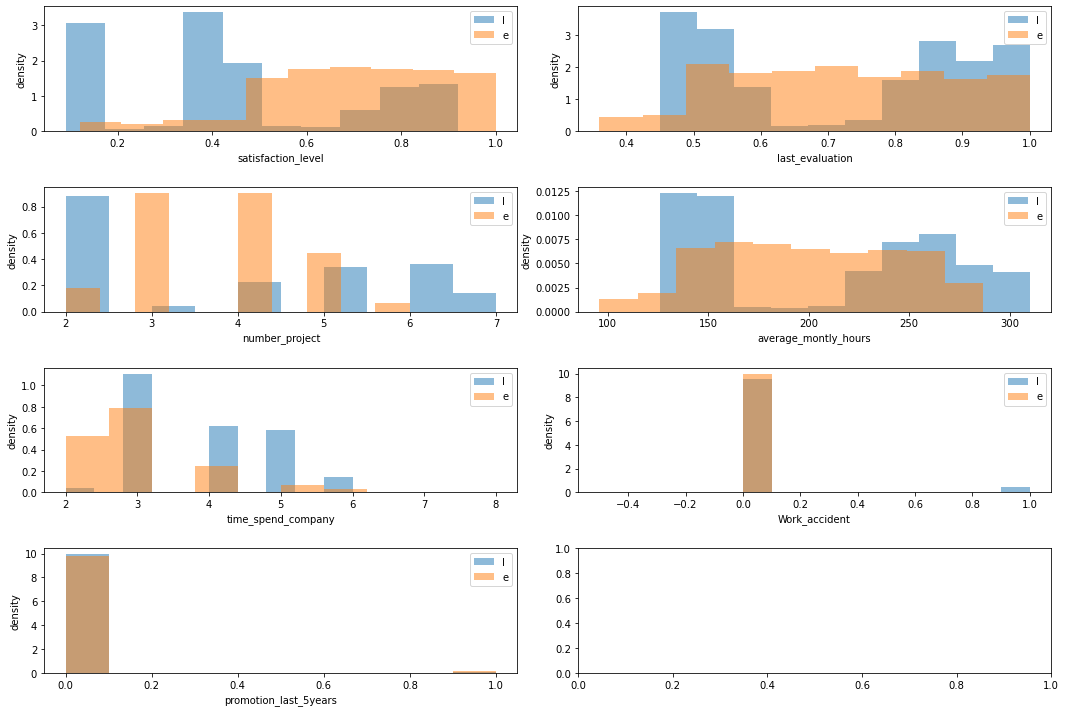

In [40]:
f,ax = plt.subplots(nrows=4, ncols=2, figsize =(15,10))
ax = ax.flatten()
for axx, col in enumerate(exist_emp.select_dtypes(include=['float64', 'int64']).columns):

    ax[axx].hist(emp_left[col], alpha=0.5, density=True, bins = 10, label =  col)
    ax[axx].hist(exist_emp[(exist_emp.cosine == 0) | (exist_emp.cosine == 3)][col], alpha=0.5, density=True, bins = 10, label = col)
    ax[axx].set_xlabel(col)
    ax[axx].set_ylabel('density')
    ax[axx].legend('le')
    
plt.tight_layout(h_pad=2.0)

C:\Users\Atanshi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Atanshi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Atanshi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Atanshi\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Atanshi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


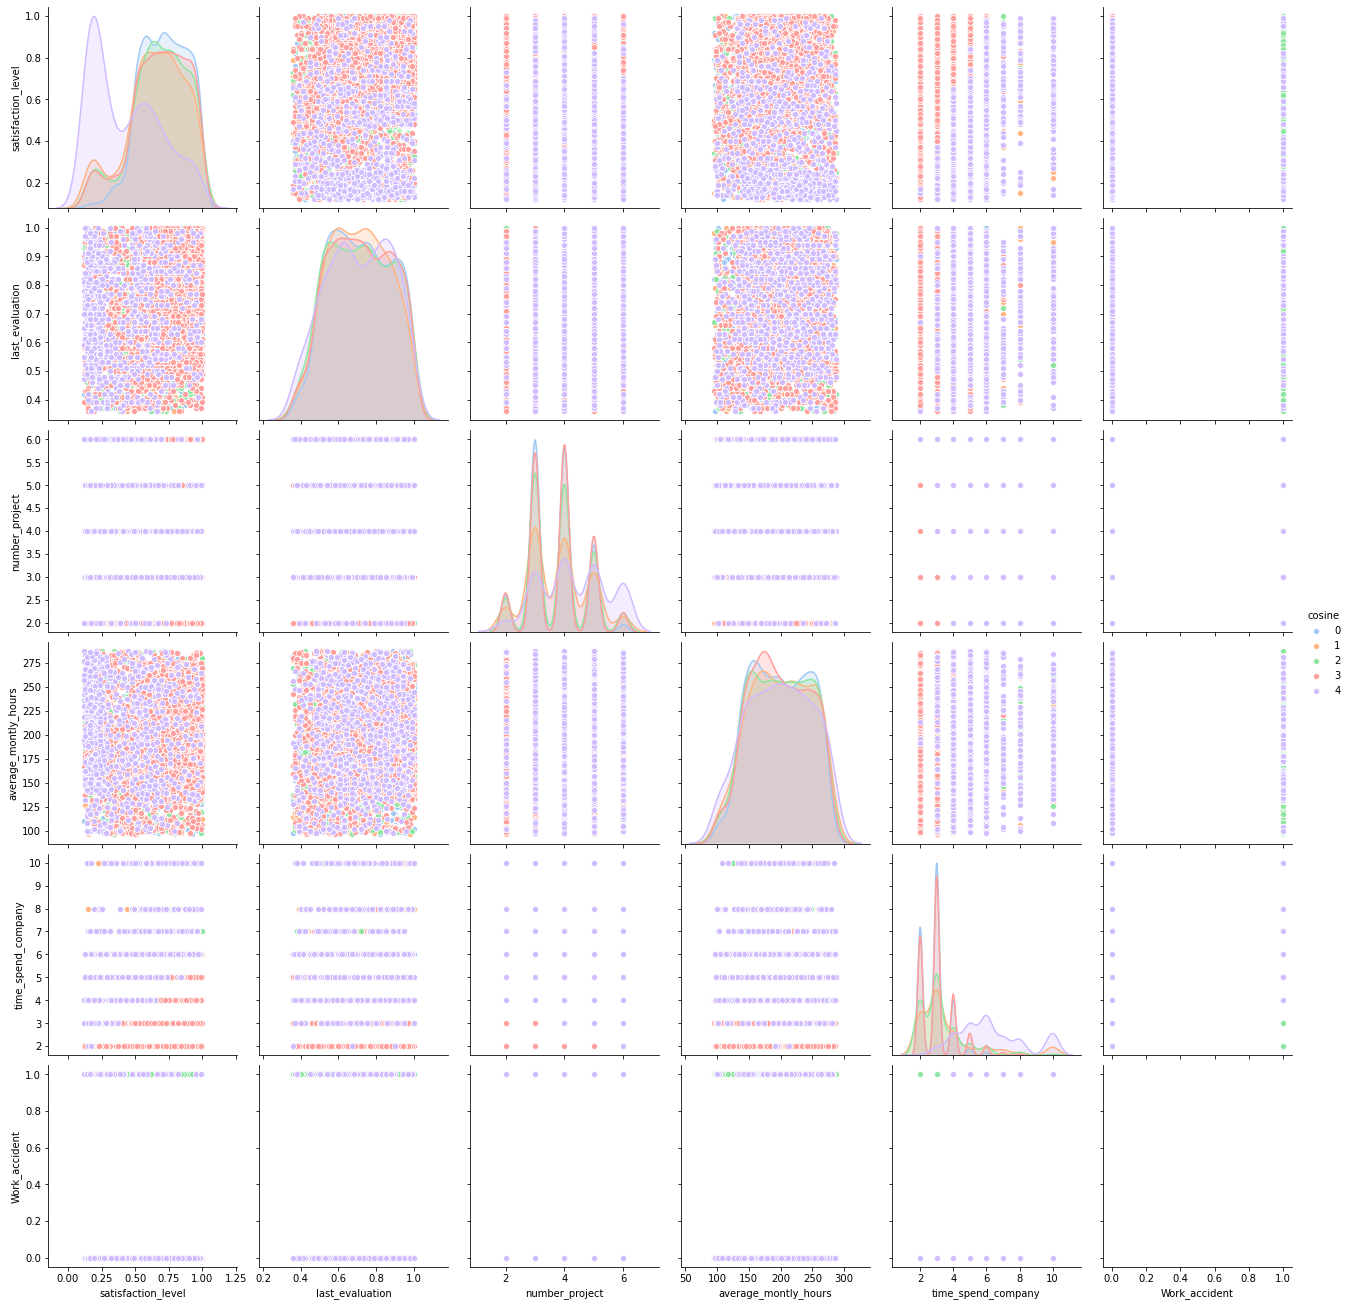

In [41]:
sns.pairplot(exist_emp[train_columns[:-3] + ['cosine']], hue='cosine', height=3.0, palette='pastel')

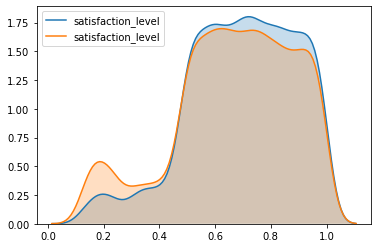

In [42]:
sns.kdeplot(exist_emp[(exist_emp.cosine == 0) | (exist_emp.cosine == 3)]['satisfaction_level'], shade=True)
sns.kdeplot(exist_emp['satisfaction_level'], shade=True )

## Result

In [43]:
#### We can dump this EMP ID list in a seperate txt file. It contains all the EMP ID which will leave the company
emp_will_leave = exist_emp[(exist_emp.cosine == 0) | (exist_emp.cosine == 3)].index.tolist()